# Homework 09
Nathan LeRoy

In [63]:
# better image quality
import matplotlib as mpl 
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 200

## Problem 1
### a.) $\{0,1,0,0\} \circledast  \{ 0, 0, 1, 0 \}$
The easiest method is using the circulant matrix method:

$$
\{0,1,0,0\} \circledast  \{ 0, 0, 1, 0 \}
=
\begin{bmatrix}
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
0 \\ 0 \\ 1 \\ 0
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 1
\end{bmatrix}
$$

### b.) $\{ 1, 1, 0, 0 \} \circledast  \{ 0, 0, 1, 1 \}$

$$
\{1,1,0,0\} \circledast  \{ 0, 0, 1, 1 \}
=
\begin{bmatrix}
1 & 0 & 0 & 1 \\
1 & 1 & 0 & 0 \\
0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
0 \\ 0 \\ 1 \\ 1
\end{bmatrix}
=
\begin{bmatrix}
1 \\ 0 \\ 1 \\ 2
\end{bmatrix}
$$


## Problem 2
Init the discrete triangle function:

### a.)

[None]

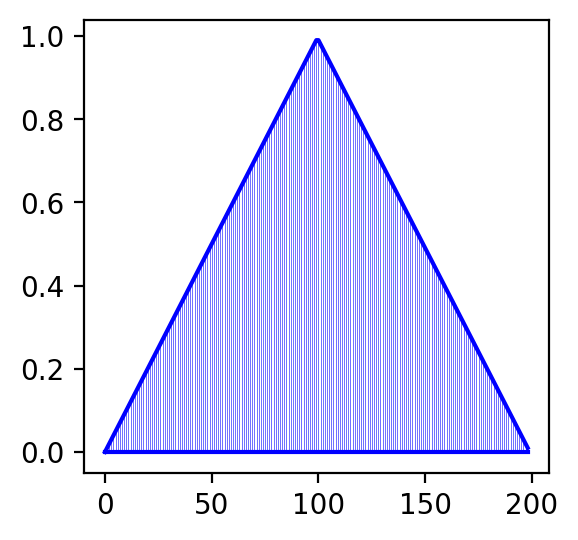

In [64]:
import numpy as np
import matplotlib.pyplot as plt

f = np.concatenate((np.arange(0,1,0.01), np.arange(0.99,0,-0.01)))
_, ax = plt.subplots(figsize=(3,3))
markerline, stemlines, baseline = ax.stem(
    f,
    linefmt="b-",
    markerfmt="b",
    basefmt="b-",
)
plt.setp(stemlines, linewidth=0.2)


Compute the circular convolution:

Function total data points: 199
Circular convolution total data points: 199


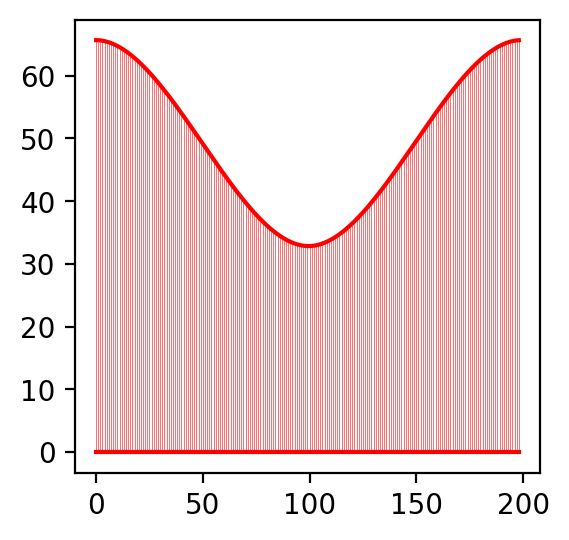

In [65]:
circ_conv = np.fft.ifft(np.fft.fft(f)*np.fft.fft(f))
_, ax = plt.subplots(figsize=(3,3))
markerline, stemlines, baseline = ax.stem(
    circ_conv.real,
    linefmt="r-",
    markerfmt="r",
    basefmt="r-",
)
plt.setp(stemlines, linewidth=0.2)
print(f"Function total data points: {len(f)}")
print(f"Circular convolution total data points: {len(circ_conv)}")

### b.) numpy conv
Using the `np.convolve` function:

Function total data points: 199
Circular convolution total data points: 397


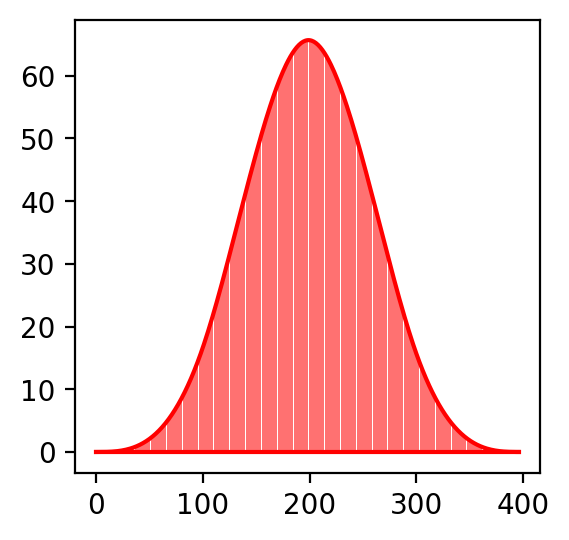

In [66]:
conv = np.convolve(f,f)
_, ax = plt.subplots(figsize=(3,3))
markerline, stemlines, baseline = ax.stem(
    conv,
    linefmt="r-",
    markerfmt="r",
    basefmt="r-",
)
plt.setp(stemlines, linewidth=0.2)
print(f"Function total data points: {len(f)}")
print(f"Circular convolution total data points: {len(conv)}")

### c.)
We can zero-pad the matrices with a python function like so:

In [67]:
def pad(a: np.ndarray, length: int):
    """Zero-pad an array of a certain length"""
    zeroarr = np.zeros(length)
    zeroarr[:len(a)] = a
    return zeroarr

If we are convolving $f$ with itself. Thus, the total length of the linear convolution is $len(f) + len(f) - 1$. Once we accomplish this and redo the convolution theroem, we can examine the results:

Function total data points: 397
Circular convolution total data points: 397


/Users/nathanleroy/Documents/uva/fa2021/bme6310/hw09/env/lib/python3.9/site-packages/numpy/ma/core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/Users/nathanleroy/Documents/uva/fa2021/bme6310/hw09/env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


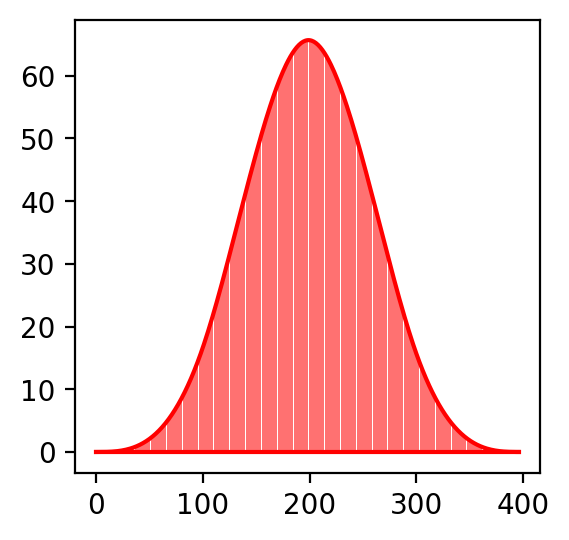

In [74]:
# pad f function
fpad = pad(f, 2*len(f) - 1)

# run through convolution theorem
fpad_conv = np.fft.ifft(np.fft.fft(fpad)*np.fft.fft(fpad))

_, ax = plt.subplots(figsize=(3,3))
markerline, stemlines, baseline = ax.stem(
    fpad_conv,
    linefmt="r-",
    markerfmt="r",
    basefmt="r-",
)
plt.setp(stemlines, linewidth=0.2)
print(f"Function total data points: {len(fpad)}")
print(f"Circular convolution total data points: {len(fpad_conv)}")

We can see that this looks exactly like the original linear convolution.

## Problem 3
### a.)
The frequency spacing in frequency space is given as $\Delta f = \dfrac{f_{s}}{N}$... Where $N$ is the number of samples and $f_{s}$ is the sampling frequency.

$$
\Delta f = \dfrac{3000 \mathrm{ Hz}}{500} = \mathrm{6 Hz}
$$

### b.)
If we want to know the maximum frequency spectral component... we need to know that it is got to be at least half our sampling frequency. Put another way, if we want to capture some sort of signal that is occuring at a frequency of $f_{a}$, then it must not exceed the Nyquist frequency which is precisely $\dfrac{f_{s}}{2}$. **Thus, the maximum frequency that we can sample is equal to half our sampling frequency or $\dfrac{3000 \mathrm{Hz}}{2} = \mathrm{1500 \mathrm{Hz}}$**

### c.)
We know that in the frequency space, we will have spectral reflections that are exactly $f_{s}$ apart in frequency space. For this problem, the spacing between reflections will be $3000 \mathrm{ Hz}$

## Problem 4
We can plot the data signal:

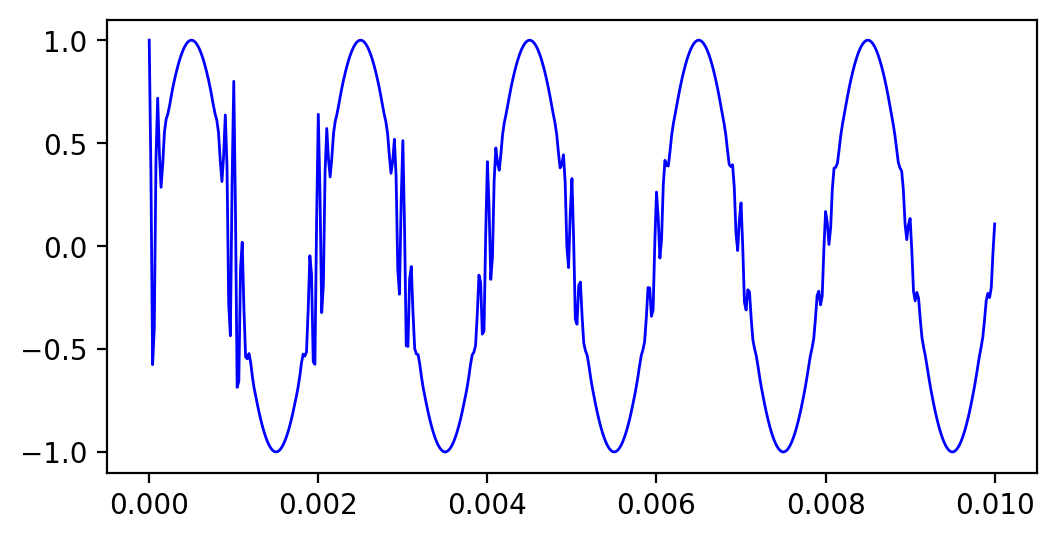

In [83]:
from scipy.io import loadmat
from scipy.signal import firwin
from helpers import plot_filt

data = loadmat("data/hw9prob4data.mat")
g = data['g'][0,:]
t = data['t'][0,:]
plt.subplots(figsize=(6,3))
plt.plot(t, g, 'b-', linewidth=1)

In order to stabilize and smooth out the signal we can apply a highpass filter with a cutoff frequency ($f_c$) around twice the frequency of the interference. In this case, that would be ~1000Hz. I am opting for a highpass filter as we know that the interference signal occurs at a low frequency of around 500Hz. Thus, the highpass filter will allow are true signal to come through while getting rid of the low frequency interference.

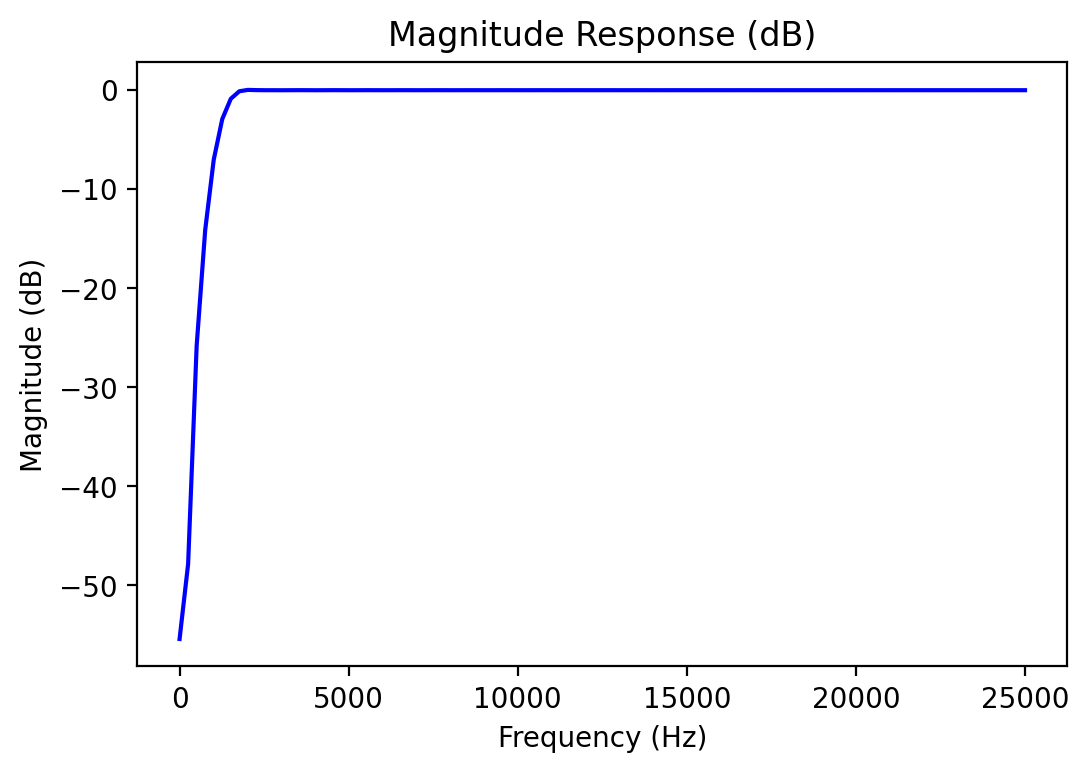

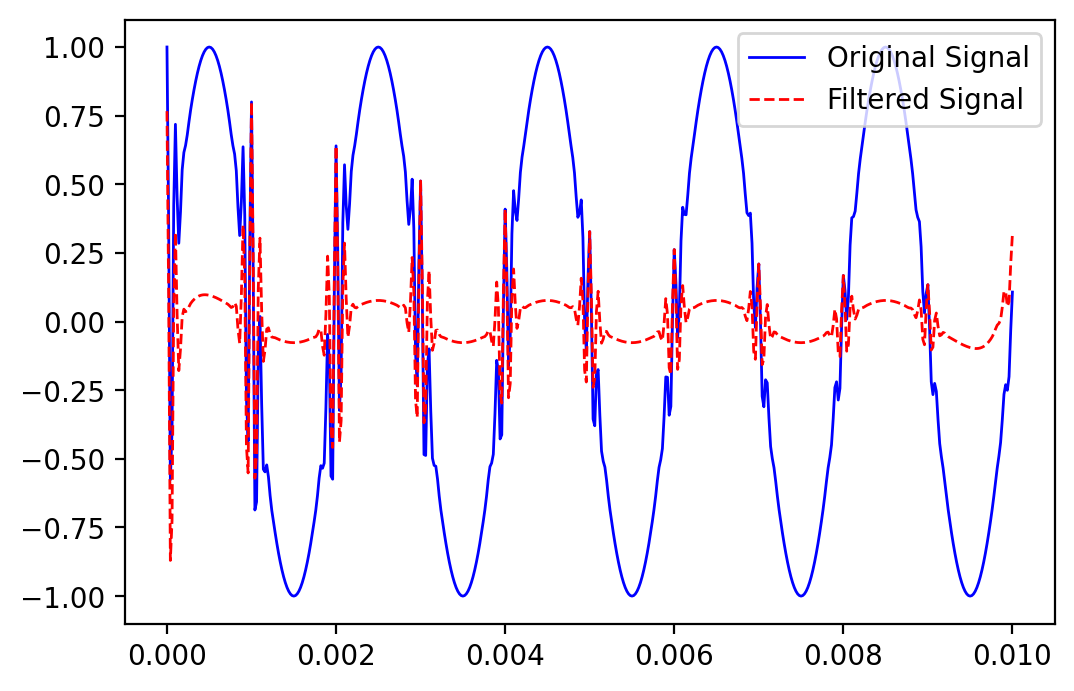

In [88]:
# create filter
filter_order = 100
cuttoff_freq = 1000
sample_rate = 50000 #50kHz
filter_type = 'highpass' # Or highpass, bandpass, bandstop
DFILT = firwin(numtaps=filter_order+1, cutoff=cuttoff_freq, pass_zero=filter_type, fs=sample_rate)

# plot and apply filter
plot_filt(DFILT, sample_rate)
g_filtered = np.convolve(DFILT, g, "same")

# view newly filtered signal
_, ax = plt.subplots(figsize=(6,4))
ax.plot(t,g, 'b-', linewidth=1)
ax.plot(t,g_filtered,'r--', linewidth=1)
ax.legend(['Original Signal','Filtered Signal'])
plt.show()


We can see after the filter is applied that we get a **much** smoother signal that removes a lot of the aliasing and interference.

## Problem 5
### Part a.)
We will plot the raw data with the reconstructed image next to it

/var/folders/_w/yrr0qqbd52gc6jj0fnqyk8640000gn/T/ipykernel_57512/1787536764.py:10: RuntimeWarning: divide by zero encountered in log
  ax[0].imshow(np.abs(np.log(d)), cmap="gray")


Text(0.5, 1.0, 'Spatial/Image Data')

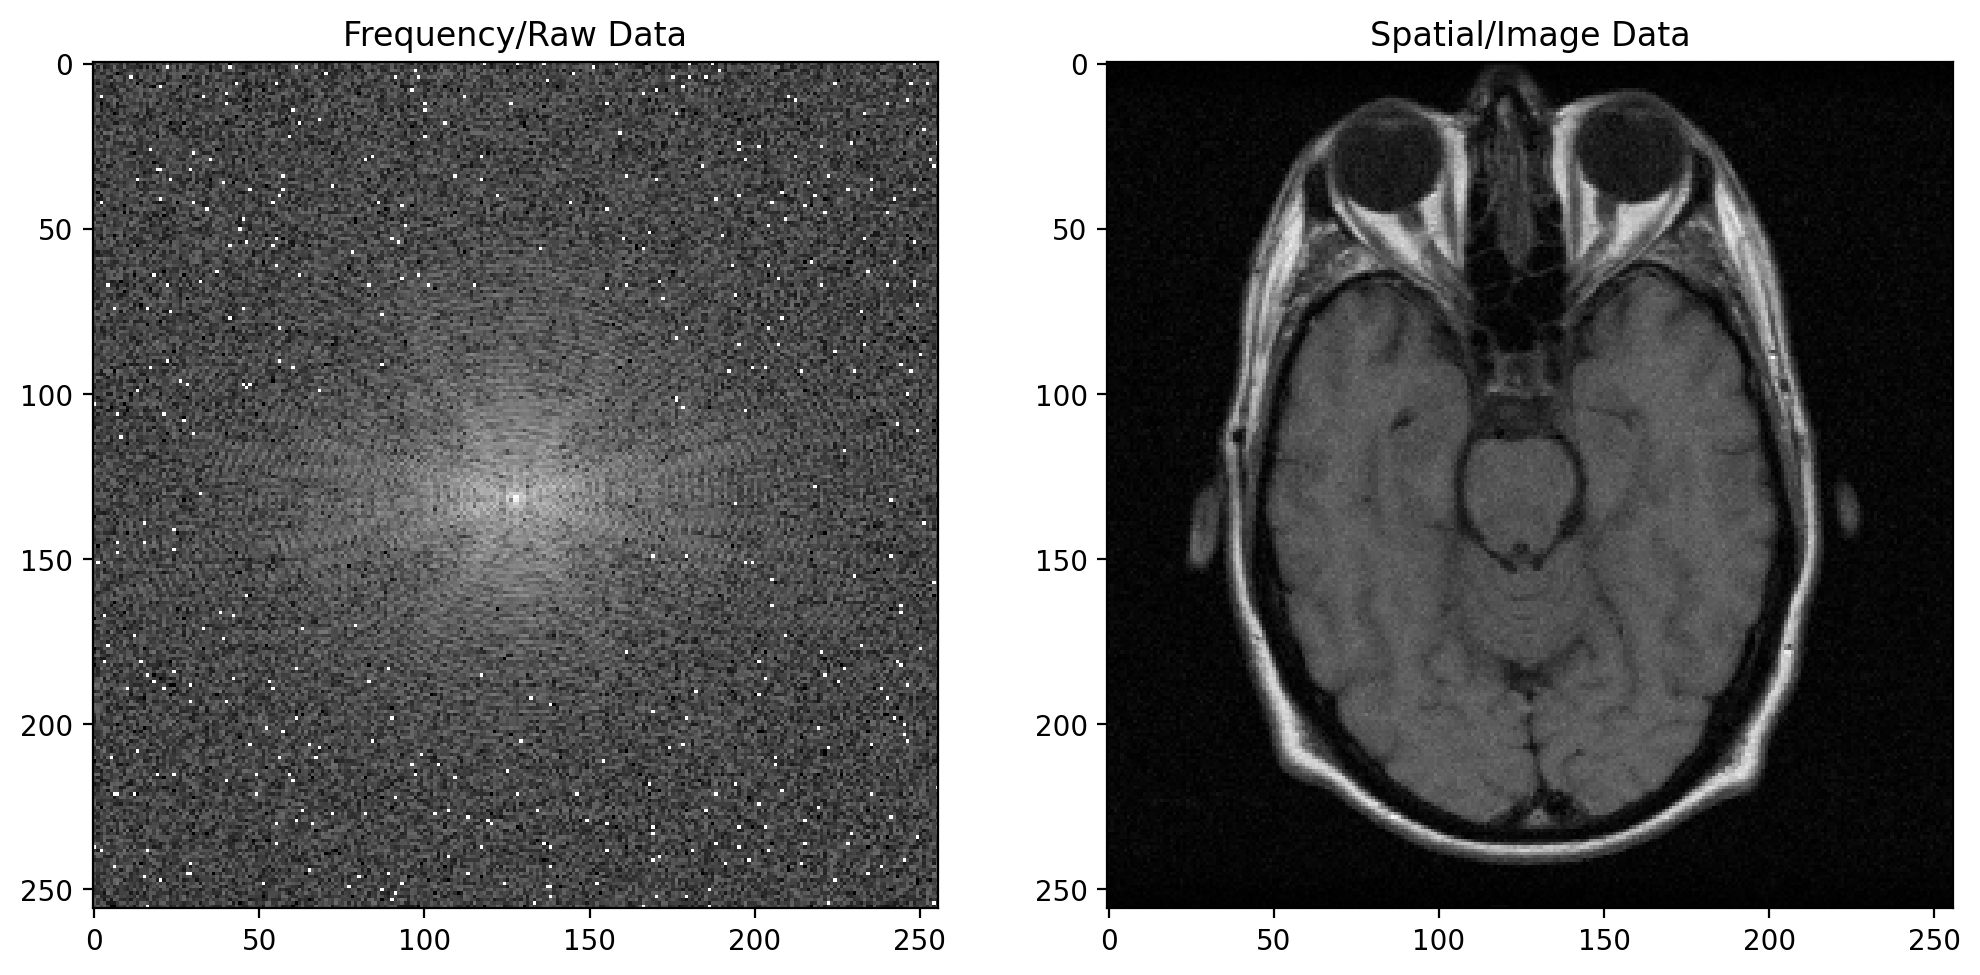

In [89]:
from helpers import ifft2c

# extract data and inverse fft
data = loadmat("data/fse_t1_ax_data.mat")
d = data['d']
d_recons = ifft2c(d)

# plot images
_, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(np.abs(np.log(d)), cmap="gray")
ax[0].set_title("Frequency/Raw Data")
ax[1].imshow(np.abs(d_recons), cmap="gray")
ax[1].set_title("Spatial/Image Data")

### part b.)
We can simulate reconstructing an image from half the original data (undersampled image):

/var/folders/_w/yrr0qqbd52gc6jj0fnqyk8640000gn/T/ipykernel_57512/1807182290.py:8: RuntimeWarning: divide by zero encountered in log
  ax[0].imshow(np.abs(np.log(dhalf)), cmap="gray")


Text(0.5, 1.0, 'Spatial/Image Data')

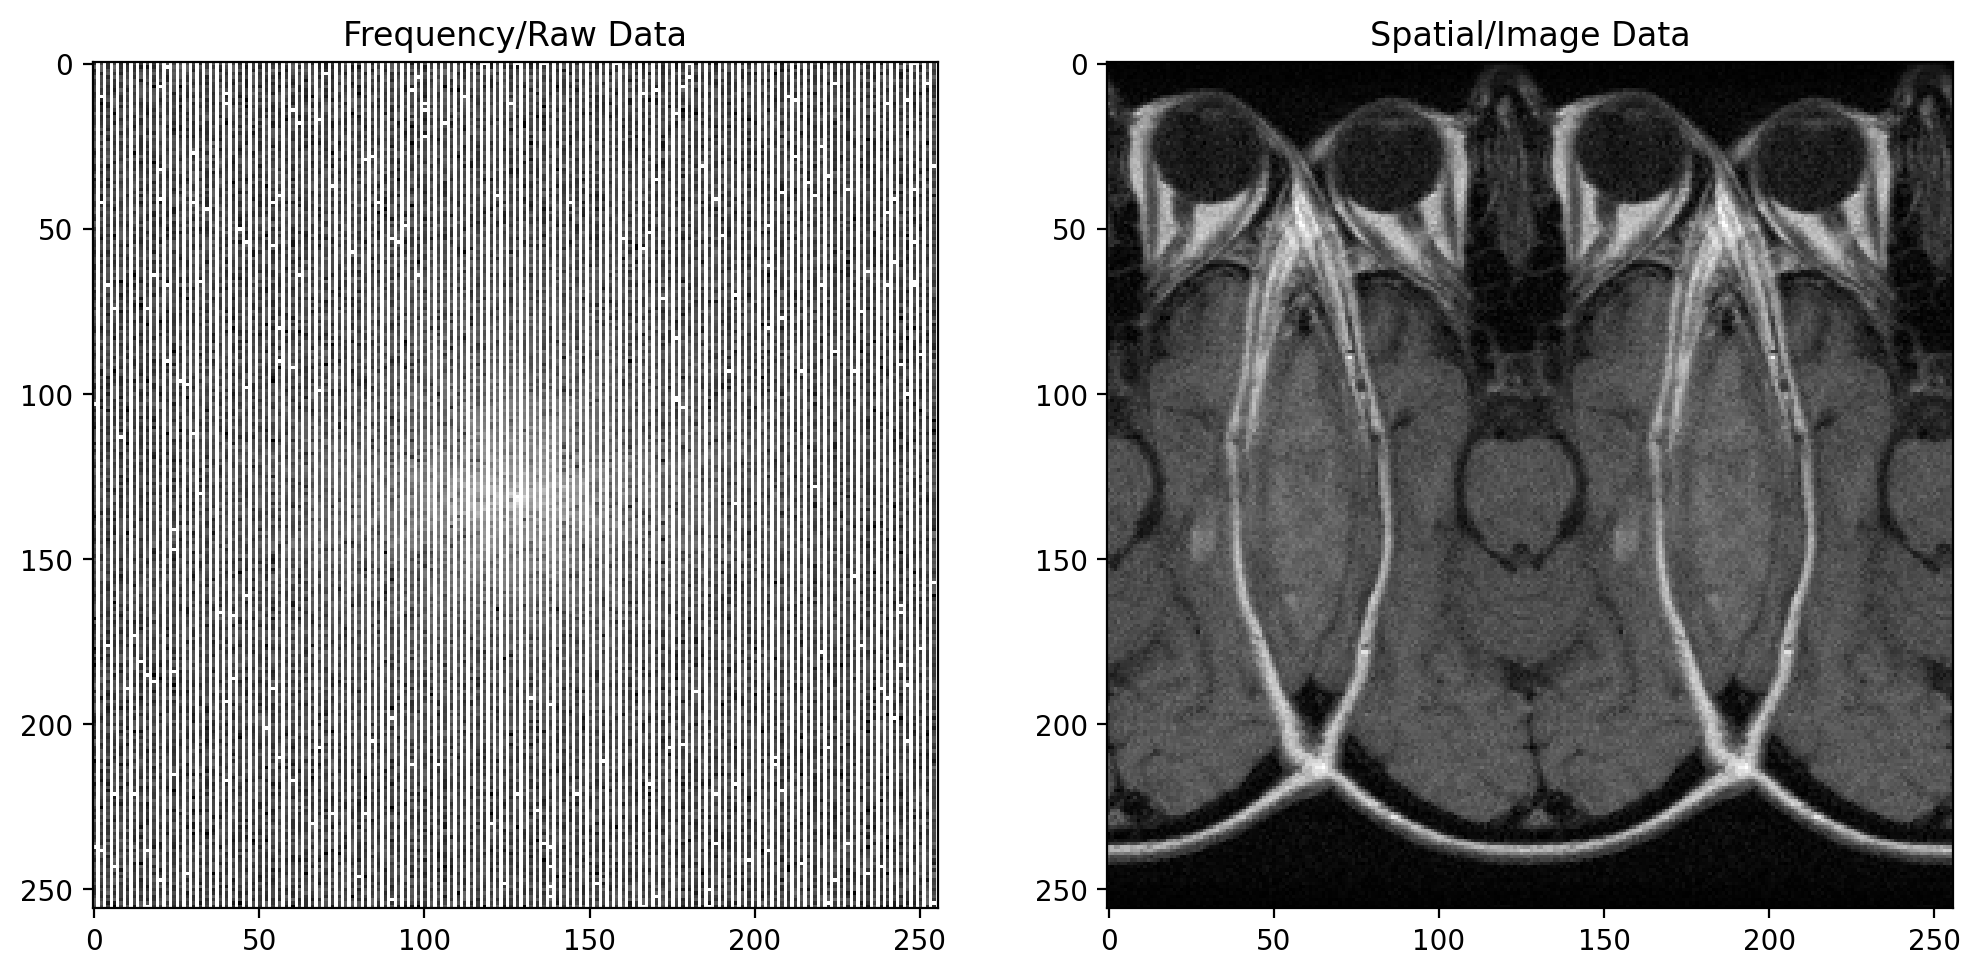

In [90]:
# reconstruct image from half the original data
dhalf = np.zeros(d.shape, dtype=complex)
dhalf[:,::2] = d[:,::2]
dhalf_recons = ifft2c(dhalf)

# plot images
_, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(np.abs(np.log(dhalf)), cmap="gray")
ax[0].set_title("Frequency/Raw Data")
ax[1].imshow(np.abs(dhalf_recons), cmap="gray")
ax[1].set_title("Spatial/Image Data")

We see a reflection of the MRI image on each side. The image is sampled in the frequency space, and thus the image is **undersampled** when we take out half the data which introduces aliasing affects to the image which causes the reflections.

### part c.)
Lets build and apply a filter to the MRI data using the `scipy.signals.firwin` package.

Text(0.5, 1.0, 'Spatial/Image Data')

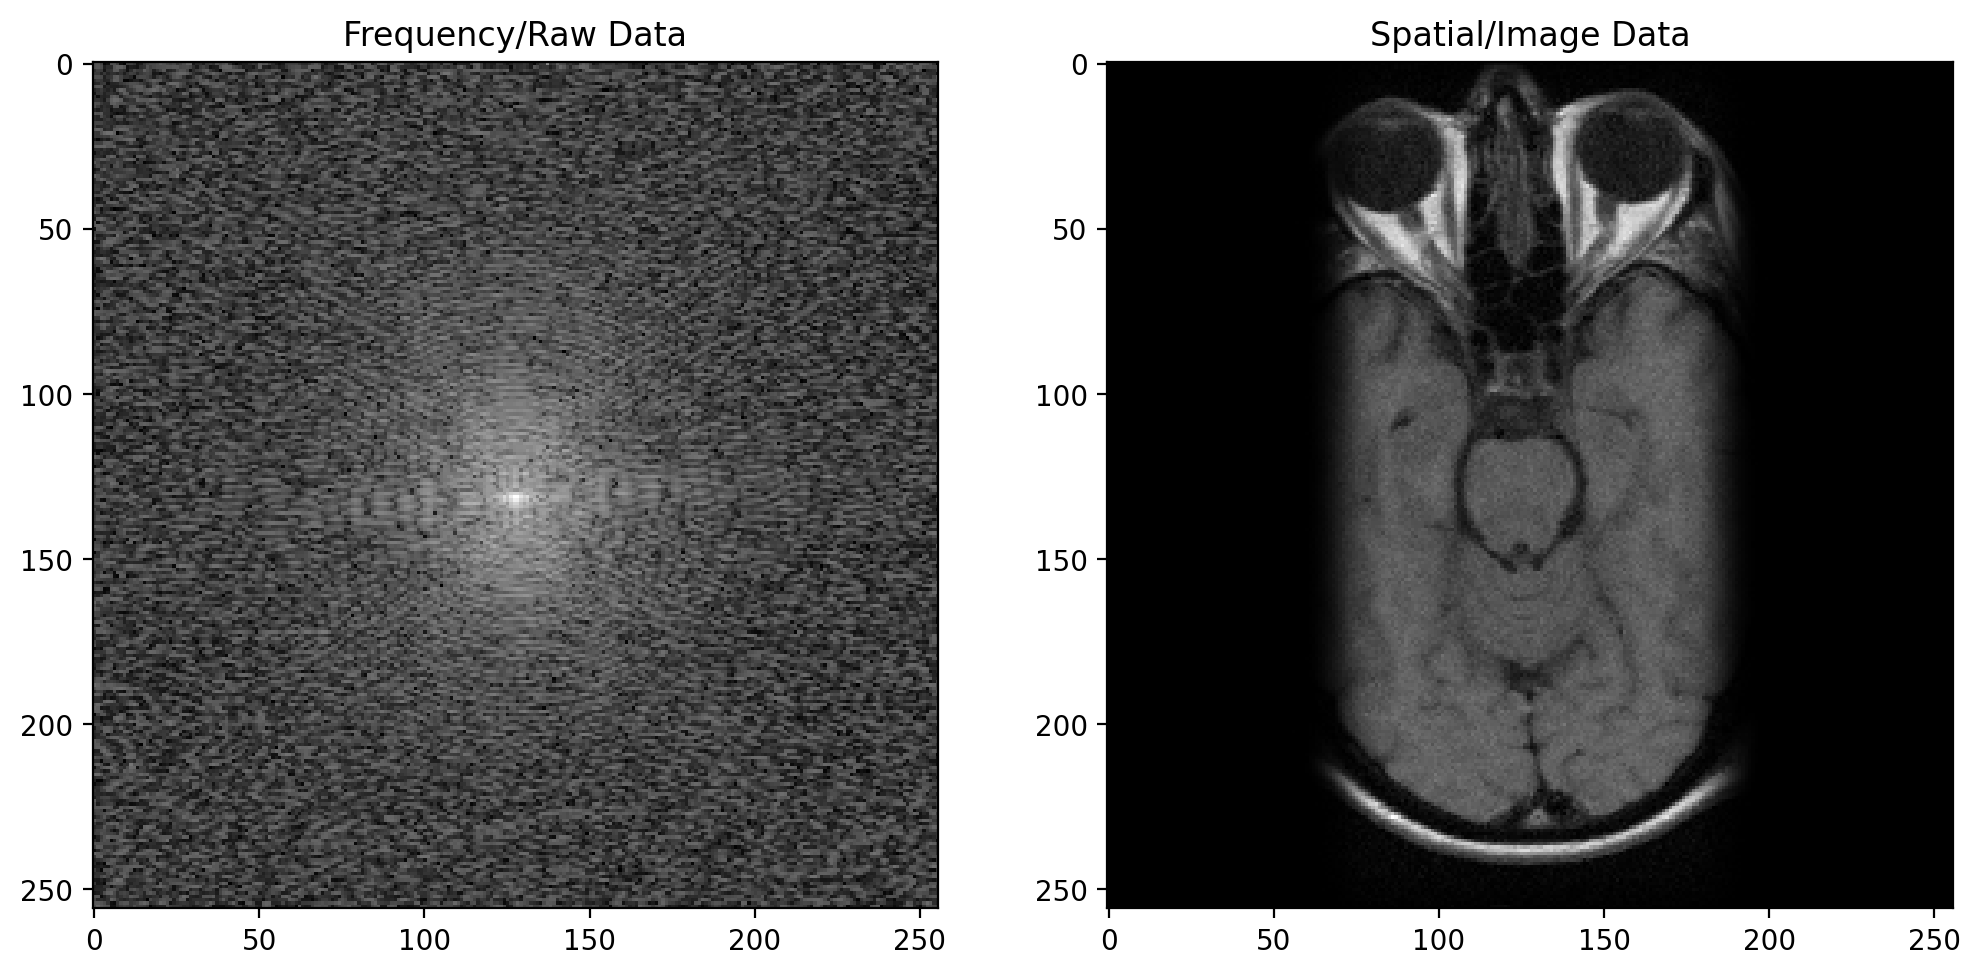

In [94]:
cutoff = 325 # Empirically set this to a number less than 750.
FILTER = firwin(numtaps=33, cutoff=cutoff, pass_zero="lowpass", fs=1500)
dfilt = np.zeros(d.shape, dtype="complex")

# convolve along each row
for n in range(d.shape[0]):
    dfilt[n,:] = np.convolve(FILTER, d[n,:], "same")
    
dfilt_recons = ifft2c(dfilt)

# plot images
_, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(np.abs(np.log(dfilt)), cmap="gray")
ax[0].set_title("Frequency/Raw Data")
ax[1].imshow(np.abs(dfilt_recons), cmap="gray")
ax[1].set_title("Spatial/Image Data")

### part d.)
We can again simulate a subsample of the filtered data:

/var/folders/_w/yrr0qqbd52gc6jj0fnqyk8640000gn/T/ipykernel_57512/2794891123.py:8: RuntimeWarning: divide by zero encountered in log
  ax[0].imshow(np.abs(np.log(dfilt_half)), cmap="gray")


Text(0.5, 1.0, 'Spatial/Image Data')

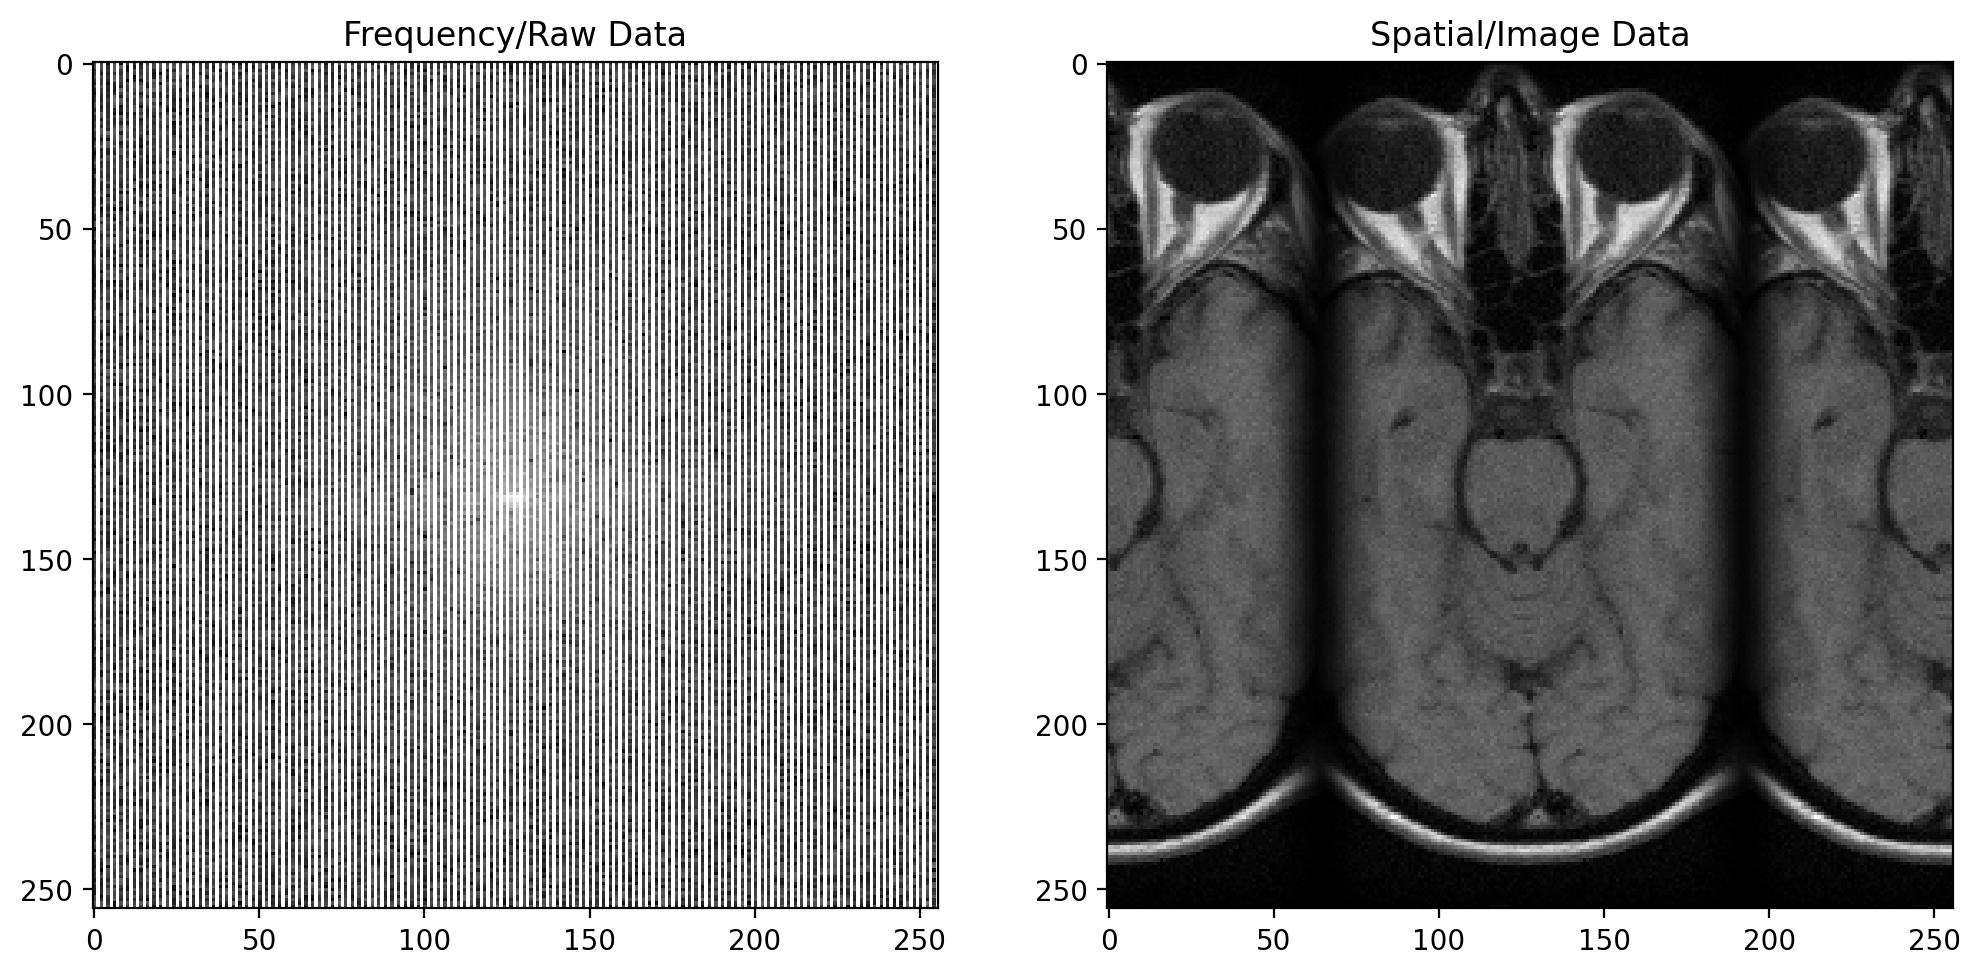

In [95]:
# reconstruct image from half the original data
dfilt_half = np.zeros(dfilt.shape, dtype=complex)
dfilt_half[:,::2] = dfilt[:,::2]
dfilt_half_recons = ifft2c(dfilt_half)

# plot images
_, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(np.abs(np.log(dfilt_half)), cmap="gray")
ax[0].set_title("Frequency/Raw Data")
ax[1].imshow(np.abs(dfilt_half_recons), cmap="gray")
ax[1].set_title("Spatial/Image Data")

### part e.)

Text(0.5, 1.0, 'Spatial/Image Data')

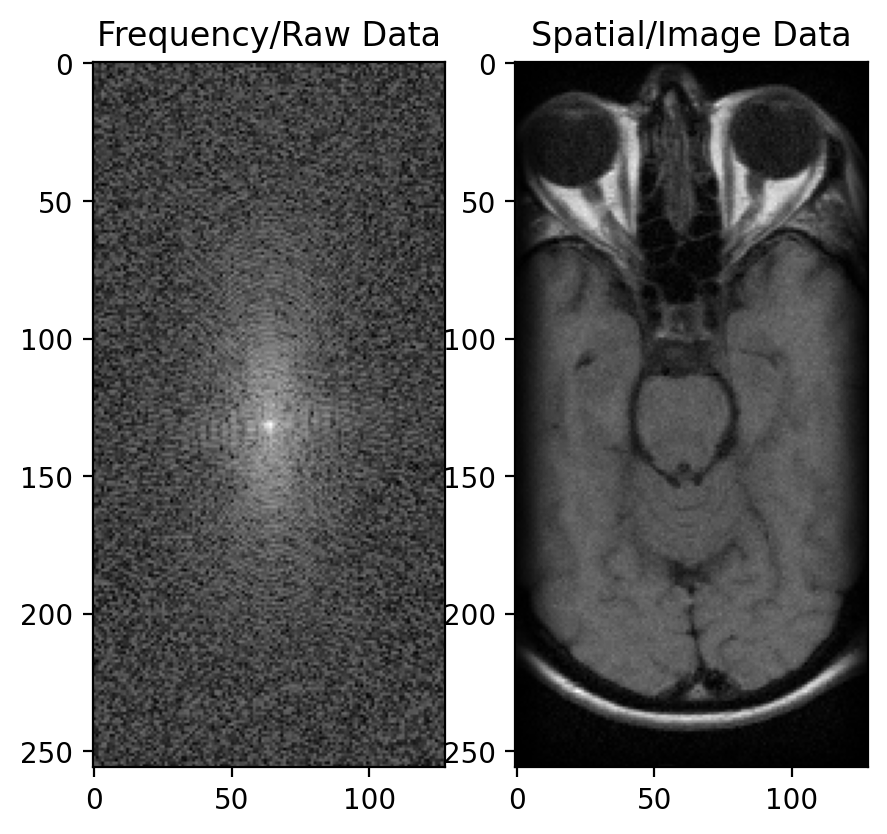

In [96]:
# generate and reconstruct a rectangular image
dfilt_rect = np.zeros((256,128), dtype=complex)
dfilt_rect[:, :]  = dfilt_half[:,0::2]
dfilt_rect_recons = ifft2c(dfilt_rect)

# plot images
_, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(np.abs(np.log(dfilt_rect)), cmap="gray")
ax[0].set_title("Frequency/Raw Data")
ax[1].imshow(np.abs(dfilt_rect_recons), cmap="gray")
ax[1].set_title("Spatial/Image Data")